# Deep Learning - MVA: Mini Project 1
## Dimitri Bouche (dimitri.bouche@ensae.fr)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import importlib

# Keras imports
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, AveragePooling2D, MaxPooling2D, Flatten, UpSampling2D, Dropout, BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn import metrics

# Local import
import mp1
importlib.reload(mp1)

<module 'mp1' from '/home/dimitribouche/Bureau/MVA/S1/DL/TP1/mp1.py'>

# 3. Simple classification
## Generate the dataset and vizualize and few data points

In [2]:
# Generate train set
[X_train, Y_train] = mp1.generate_dataset_classification(300, 20)

# Encode the label in "One hot encoding"
Y_train_onehot = (np_utils.to_categorical(Y_train)).astype(int)

#G et dimensions
d = X_train.shape[1]
ntrain = X_train.shape[0]
# Sizes of non flattened images
d_sqrt = int(np.sqrt(d))

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


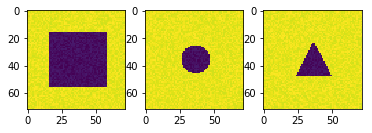

In [3]:
# Plot a data point for each class
rect = X_train[np.argwhere(Y_train == 0)[0], :].reshape((d_sqrt, d_sqrt))
circ = X_train[np.argwhere(Y_train == 1)[0], :].reshape((d_sqrt, d_sqrt))
tria = X_train[np.argwhere(Y_train == 2)[0], :].reshape((d_sqrt, d_sqrt))
fig, ax = plt.subplots(ncols=3)
ax[0].imshow(rect)
ax[1].imshow(circ)
ax[2].imshow(tria)

## Linear probabilities model with softmax activation for classification

### Model architecture
We are basically performing a logistic regression here. We have no hidden layer and as a consequence the number of neurons is the number of classes. Given an input vector $x$, neuron 1 will contain $w_1^Tx + b_1$, neuron 2 will contain $w_2^Tx + b_2$ and neuron 3 contains: $w_3^Tx + b_3$. Then we apply the softmax function to transform those linear neurons into probabilities of being in a class. 

In [4]:
# Create empty sequential model
model = Sequential()

# Add the first (and last) layer for linear classification
model.add(Dense(units=3, input_shape=(d, )))

# Add activation function for this layer
# We are using a linear probability model very much like the logistic regression
# Softmax ensures that our probabilities stay within the [0, 1] range
model.add(Activation("softmax"))

### Model training with SGD
We use the categorical_crossentropy loss since we are dealing with classification.

In [5]:
# Compile model. 
model.compile(loss='categorical_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])


# Fit the model with SGD optimizer
epochs = 500
batch_size = 32
history = model.fit(X_train, Y_train_onehot, epochs=epochs, batch_size=batch_size)

Epoch 1/500
300/300 [==============================] - 1s 3ms/step - loss: 8.5455 - acc: 0.2800
Epoch 2/500
300/300 [==============================] - 0s 119us/step - loss: 6.9591 - acc: 0.4633
Epoch 3/500
300/300 [==============================] - 0s 109us/step - loss: 7.0243 - acc: 0.4733
Epoch 4/500
300/300 [==============================] - 0s 101us/step - loss: 6.7526 - acc: 0.4233
Epoch 5/500
300/300 [==============================] - 0s 118us/step - loss: 5.9216 - acc: 0.6200
Epoch 6/500
300/300 [==============================] - 0s 118us/step - loss: 5.8512 - acc: 0.6300
Epoch 7/500
300/300 [==============================] - 0s 98us/step - loss: 5.8396 - acc: 0.6333
Epoch 8/500
300/300 [==============================] - 0s 124us/step - loss: 5.8395 - acc: 0.6333
Epoch 9/500
300/300 [==============================] - 0s 109us/step - loss: 5.8333 - acc: 0.6300
Epoch 10/500
300/300 [==============================] - 0s 138us/step - loss: 5.8325 - acc: 0.6333
Epoch 11/500
300/300 [

300/300 [==============================] - 0s 99us/step - loss: 5.8060 - acc: 0.6400
Epoch 85/500
300/300 [==============================] - 0s 104us/step - loss: 5.8060 - acc: 0.6400
Epoch 86/500
300/300 [==============================] - 0s 96us/step - loss: 5.8059 - acc: 0.6400
Epoch 87/500
300/300 [==============================] - 0s 83us/step - loss: 5.8060 - acc: 0.6400
Epoch 88/500
300/300 [==============================] - 0s 85us/step - loss: 5.8059 - acc: 0.6400
Epoch 89/500
300/300 [==============================] - 0s 82us/step - loss: 5.8058 - acc: 0.6400
Epoch 90/500
300/300 [==============================] - 0s 98us/step - loss: 5.8061 - acc: 0.6400
Epoch 91/500
300/300 [==============================] - 0s 101us/step - loss: 5.8058 - acc: 0.6400
Epoch 92/500
300/300 [==============================] - 0s 105us/step - loss: 5.8060 - acc: 0.6400
Epoch 93/500
300/300 [==============================] - 0s 91us/step - loss: 5.8057 - acc: 0.6400
Epoch 94/500
300/300 [========

300/300 [==============================] - 0s 111us/step - loss: 5.8044 - acc: 0.6400
Epoch 167/500
300/300 [==============================] - 0s 88us/step - loss: 5.8044 - acc: 0.6400
Epoch 168/500
300/300 [==============================] - 0s 88us/step - loss: 5.8044 - acc: 0.6400
Epoch 169/500
300/300 [==============================] - 0s 89us/step - loss: 5.8043 - acc: 0.6400
Epoch 170/500
300/300 [==============================] - 0s 97us/step - loss: 5.8044 - acc: 0.6400
Epoch 171/500
300/300 [==============================] - 0s 92us/step - loss: 5.8043 - acc: 0.6400
Epoch 172/500
300/300 [==============================] - 0s 68us/step - loss: 5.8044 - acc: 0.6400
Epoch 173/500
300/300 [==============================] - 0s 101us/step - loss: 5.8043 - acc: 0.6400
Epoch 174/500
300/300 [==============================] - 0s 78us/step - loss: 5.8043 - acc: 0.6400
Epoch 175/500
300/300 [==============================] - 0s 98us/step - loss: 5.8043 - acc: 0.6400
Epoch 176/500
300/300 

300/300 [==============================] - 0s 102us/step - loss: 5.8038 - acc: 0.6400
Epoch 249/500
300/300 [==============================] - 0s 102us/step - loss: 5.8038 - acc: 0.6400
Epoch 250/500
300/300 [==============================] - 0s 100us/step - loss: 5.8038 - acc: 0.6400
Epoch 251/500
300/300 [==============================] - 0s 104us/step - loss: 5.8038 - acc: 0.6400
Epoch 252/500
300/300 [==============================] - 0s 103us/step - loss: 5.8038 - acc: 0.6400
Epoch 253/500
300/300 [==============================] - 0s 103us/step - loss: 5.8038 - acc: 0.6400
Epoch 254/500
300/300 [==============================] - 0s 112us/step - loss: 5.8038 - acc: 0.6400
Epoch 255/500
300/300 [==============================] - 0s 104us/step - loss: 5.8038 - acc: 0.6400
Epoch 256/500
300/300 [==============================] - 0s 79us/step - loss: 5.8038 - acc: 0.6400
Epoch 257/500
300/300 [==============================] - 0s 95us/step - loss: 5.8037 - acc: 0.6400
Epoch 258/500
30

300/300 [==============================] - 0s 86us/step - loss: 5.8035 - acc: 0.6400
Epoch 331/500
300/300 [==============================] - 0s 93us/step - loss: 5.8035 - acc: 0.6400
Epoch 332/500
300/300 [==============================] - 0s 94us/step - loss: 5.8035 - acc: 0.6400
Epoch 333/500
300/300 [==============================] - 0s 82us/step - loss: 5.8035 - acc: 0.6400
Epoch 334/500
300/300 [==============================] - 0s 97us/step - loss: 5.8035 - acc: 0.6400
Epoch 335/500
300/300 [==============================] - 0s 103us/step - loss: 5.8035 - acc: 0.6400
Epoch 336/500
300/300 [==============================] - 0s 105us/step - loss: 5.8035 - acc: 0.6400
Epoch 337/500
300/300 [==============================] - 0s 100us/step - loss: 5.8035 - acc: 0.6400
Epoch 338/500
300/300 [==============================] - 0s 101us/step - loss: 5.8035 - acc: 0.6400
Epoch 339/500
300/300 [==============================] - 0s 92us/step - loss: 5.8035 - acc: 0.6400
Epoch 340/500
300/30

300/300 [==============================] - 0s 79us/step - loss: 5.8033 - acc: 0.6400
Epoch 413/500
300/300 [==============================] - 0s 111us/step - loss: 5.8033 - acc: 0.6400
Epoch 414/500
300/300 [==============================] - 0s 85us/step - loss: 5.8033 - acc: 0.6400
Epoch 415/500
300/300 [==============================] - 0s 93us/step - loss: 5.8033 - acc: 0.6400
Epoch 416/500
300/300 [==============================] - 0s 90us/step - loss: 5.8033 - acc: 0.6400
Epoch 417/500
300/300 [==============================] - 0s 91us/step - loss: 5.8033 - acc: 0.6400
Epoch 418/500
300/300 [==============================] - 0s 89us/step - loss: 5.8033 - acc: 0.6400
Epoch 419/500
300/300 [==============================] - 0s 93us/step - loss: 5.8033 - acc: 0.6400
Epoch 420/500
300/300 [==============================] - 0s 104us/step - loss: 5.8033 - acc: 0.6400
Epoch 421/500
300/300 [==============================] - 0s 103us/step - loss: 5.8033 - acc: 0.6400
Epoch 422/500
300/300

300/300 [==============================] - 0s 101us/step - loss: 5.8032 - acc: 0.6400
Epoch 495/500
300/300 [==============================] - 0s 103us/step - loss: 5.8032 - acc: 0.6400
Epoch 496/500
300/300 [==============================] - 0s 88us/step - loss: 5.8032 - acc: 0.6400
Epoch 497/500
300/300 [==============================] - 0s 85us/step - loss: 5.8032 - acc: 0.6400
Epoch 498/500
300/300 [==============================] - 0s 96us/step - loss: 5.8032 - acc: 0.6400
Epoch 499/500
300/300 [==============================] - 0s 83us/step - loss: 5.8032 - acc: 0.6400
Epoch 500/500
300/300 [==============================] - 0s 85us/step - loss: 5.8032 - acc: 0.6400


**Remark on SGD**: We get stuck very rapidly in a local minima and the training thus does not work. 

### Model training with Adam optimizer

In [6]:
# Create empty sequential model
model = Sequential()

# Add the first (and last) layer for linear classification
model.add(Dense(units=3, input_shape=(d, )))

# Add activation function for this layer
# We are using a linear probability model very much like the logistic regression
# Softmax ensures that our probabilities stay within the [0, 1] range
model.add(Activation("softmax"))

# Compile model. 
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


# Fit the model with SGD optimizer
epochs = 50
batch_size = 32
history = model.fit(X_train, Y_train_onehot, epochs=epochs, batch_size=batch_size)

Epoch 1/50
300/300 [==============================] - 0s 671us/step - loss: 1.8891 - acc: 0.3733
Epoch 2/50
300/300 [==============================] - 0s 88us/step - loss: 0.8974 - acc: 0.5600
Epoch 3/50
300/300 [==============================] - 0s 100us/step - loss: 0.5253 - acc: 0.7900
Epoch 4/50
300/300 [==============================] - 0s 139us/step - loss: 0.3963 - acc: 0.8367
Epoch 5/50
300/300 [==============================] - 0s 145us/step - loss: 0.3096 - acc: 0.9167
Epoch 6/50
300/300 [==============================] - 0s 134us/step - loss: 0.2728 - acc: 0.9200
Epoch 7/50
300/300 [==============================] - 0s 114us/step - loss: 0.2563 - acc: 0.9267
Epoch 8/50
300/300 [==============================] - 0s 129us/step - loss: 0.2204 - acc: 0.9533
Epoch 9/50
300/300 [==============================] - 0s 105us/step - loss: 0.2019 - acc: 0.9533
Epoch 10/50
300/300 [==============================] - 0s 138us/step - loss: 0.1799 - acc: 0.9800
Epoch 11/50
300/300 [=========

**Remark on Adam optimizer**: As opposed to SGD we do not get stuck, and in fact after only the 20-th epoch, we reach almost perfect accuracy on the training set.

In [7]:
# Test on one observation
X_test = mp1.generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict_proba(X_test)

array([[0., 1., 0.]], dtype=float32)

In [8]:
# Generate test set
[X_test, Y_test] = mp1.generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [17]:
# Predict on test set using the fitted network
Y_pred = model.predict(X_test)
Y_pred_labels = np.argmax(Y_pred, axis=1)
score = sklearn.metrics.accuracy_score(Y_pred_labels, Y_test)
print(score)

1.0


We get 100% accuracy even on the test set !

# 3. Vizualize

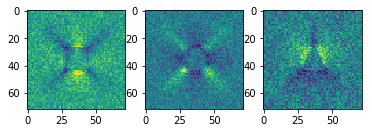

In [180]:
# Get weights matrix
w = model.get_weights()[0]
fig, ax = plt.subplots(ncols=3)
for i in range(0, 3):
    ax[i].imshow(w[:, i].reshape((d_sqrt, d_sqrt)))

**Remark on visualization**: We can see the outline of the different geometric shapes in their respective weights. 

# 4. A more complex classification problem
## Load the dataset and vizualize a few points

In [18]:
# Reshape data to 2D images
def reshape_to_2D(flat_im):
    d = flat_im.shape[0]
    d_sqrt = int(np.sqrt(d))
    return flat_im.reshape((d_sqrt, d_sqrt))

In [19]:
# Generate the dataset
[X_train, Y_train] = mp1.generate_dataset_classification(300, 20, True)

# Encode the label in "One hot encoding"
Y_train_onehot = (np_utils.to_categorical(Y_train)).astype(int)

# Put Xs back to 2D
X_train2D = np.array([reshape_to_2D(x) for x in X_train])

# Reshape to match the convolutionnal network input format
X_train2D = X_train2D.reshape(X_train2D.shape + (1, ))

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


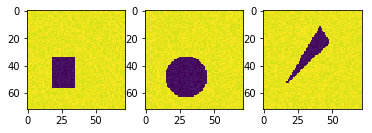

In [20]:
# Plot a data point for each class
rect = X_train2D[np.argwhere(Y_train == 0)[0][0], :, :, 0]
circ = X_train2D[np.argwhere(Y_train == 1)[0][0], :, :, 0]
tria = X_train2D[np.argwhere(Y_train == 2)[0][0], :, :, 0]
fig, ax = plt.subplots(ncols=3)
ax[0].imshow(rect)
ax[1].imshow(circ)
ax[2].imshow(tria)

## Linear classifier

In [36]:
# Create empty sequential model
model = Sequential()

# Add the first (and last) layer for linear classification
model.add(Dense(units=3, input_shape=(d, )))

# Add activation function for this layer
# We are using a linear probability model very much like the logistic regression
# Softmax ensures that our probabilities stay within the [0, 1] range
model.add(Activation("softmax"))

In [37]:
# Create empty sequential model
model = Sequential()

# Add the first (and last) layer for linear classification
model.add(Dense(units=3, input_shape=(d, )))

# Add activation function for this layer
# We are using a linear probability model very much like the logistic regression
# Softmax ensures that our probabilities stay within the [0, 1] range
model.add(Activation("softmax"))

# Compile model. 
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


# Fit the model with SGD optimizer
epochs = 50
batch_size = 32
history = model.fit(X_train, Y_train_onehot, epochs=epochs, batch_size=batch_size)

Epoch 1/50
300/300 [==============================] - 0s 1ms/step - loss: 2.0492 - acc: 0.3533
Epoch 2/50
300/300 [==============================] - 0s 92us/step - loss: 1.2314 - acc: 0.4200
Epoch 3/50
300/300 [==============================] - 0s 118us/step - loss: 1.4513 - acc: 0.4233
Epoch 4/50
300/300 [==============================] - 0s 137us/step - loss: 1.3945 - acc: 0.4633
Epoch 5/50
300/300 [==============================] - 0s 143us/step - loss: 1.0244 - acc: 0.4900
Epoch 6/50
300/300 [==============================] - 0s 127us/step - loss: 0.9413 - acc: 0.5200
Epoch 7/50
300/300 [==============================] - 0s 110us/step - loss: 1.0138 - acc: 0.5600
Epoch 8/50
300/300 [==============================] - 0s 114us/step - loss: 0.9125 - acc: 0.5433
Epoch 9/50
300/300 [==============================] - 0s 122us/step - loss: 0.8113 - acc: 0.6267
Epoch 10/50
300/300 [==============================] - 0s 141us/step - loss: 0.8131 - acc: 0.6033
Epoch 11/50
300/300 [===========

## Test of linear classifier

In [40]:
# Generate the dataset for testing
[X_test, Y_test] = mp1.generate_dataset_classification(300, 20, True)

# Encode the label in "One hot encoding"
Y_test_onehot = (np_utils.to_categorical(Y_test)).astype(int)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [42]:
# Evaluate model on test set
model.evaluate(X_test, Y_test_onehot)

300/300 [==============================] - 0s 56us/step


[0.7728351966540019, 0.6100000007947286]

We get only a 61% accuracy

## Convolutionnal neural network
###  Architecture
We use the architecture recommended in mp1.pdf as it is a somewhat "minimalist" convolutionnal architecture. Since we have only a few datapoints to learn on, it seems reasonnable not to use deeper architecture since we already have a huge number of parameters to learn compared to the number of datapoints that we have. We however increase the number of training data because we still have an order of magnitude more parameters to learn

In [56]:
# Generate the dataset
[X_train, Y_train] = mp1.generate_dataset_classification(1000, 20, True)

# Encode the label in "One hot encoding"
Y_train_onehot = (np_utils.to_categorical(Y_train)).astype(int)

# Put Xs back to 2D
X_train2D = np.array([reshape_to_2D(x) for x in X_train])

# Reshape to match the convolutionnal network input format
X_train2D = X_train2D.reshape(X_train2D.shape + (1, ))

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990


In [57]:
# Create empty sequential model
model = Sequential()

# Add convolutionnal layer with relu activation function
model.add(Conv2D(filters=16, kernel_size=5, input_shape=X_train2D[0, :, :, :].shape))
model.add(Activation("relu"))

# Add mean pooling layer with relu activation function
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Activation("relu"))

# Add flatten layer to go back to 1D
model.add(Flatten())

# Add output dense layer with softmax activation
model.add(Dense(units=3))
model.add(Activation("softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 68, 68, 16)        416       
_________________________________________________________________
activation_20 (Activation)   (None, 68, 68, 16)        0         
_________________________________________________________________
average_pooling2d_6 (Average (None, 34, 34, 16)        0         
_________________________________________________________________
activation_21 (Activation)   (None, 34, 34, 16)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 18496)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 55491     
_________________________________________________________________
activation_22 (Activation)   (None, 3)                 0         
Total para

### Optimization
We use the Adam optimizer since it proved superior to SGD in the previous question

In [58]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])


# Fit the model with adam optimizer
epochs = 80
batch_size = 32
history = model.fit(X_train2D, Y_train_onehot, epochs=epochs, batch_size=batch_size)

Epoch 1/80
1000/1000 [==============================] - 2s 2ms/step - loss: 1.1839 - acc: 0.4020
Epoch 2/80
1000/1000 [==============================] - 2s 2ms/step - loss: 0.9347 - acc: 0.6350
Epoch 3/80
1000/1000 [==============================] - 2s 2ms/step - loss: 0.8101 - acc: 0.6350
Epoch 4/80
1000/1000 [==============================] - 2s 2ms/step - loss: 0.7527 - acc: 0.6610
Epoch 5/80
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6990 - acc: 0.6990
Epoch 6/80
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6496 - acc: 0.7160
Epoch 7/80
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6156 - acc: 0.7640
Epoch 8/80
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6025 - acc: 0.7560
Epoch 9/80
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5896 - acc: 0.7600
Epoch 10/80
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5714 - acc: 0.7560
Epoch 11/80
1000/1000 [======

## Test of convolutionnal network

In [45]:
# Generate the dataset for testing
[X_test, Y_test] = mp1.generate_dataset_classification(300, 20, True)

# Put Xs back to 2D
X_test2D = np.array([reshape_to_2D(x) for x in X_test])

# Encode the label in "One hot encoding"
Y_test_onehot = (np_utils.to_categorical(Y_test)).astype(int)

# Reshape to match the convolutionnal network input format
X_test2D = X_test2D.reshape(X_test2D.shape + (1, ))

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [59]:
# Predict on test set using the fitted network
print(model.evaluate(X_test2D, Y_test_onehot))
print(model.metrics_names)

300/300 [==============================] - 0s 2ms/step
[1.1027973000208537, 0.7266666674613953]
['loss', 'acc']


**Remarks**: We reach very fast almost 100% accuracy very fast on the training set. However those result do not generalize very well on the test set where we reach 72% accuracy. This is a 10% improvement in comparison with the Linear classifier, however we used 3 times more training inputs. 

# 5. A regression problem

## Load the dataset

In [208]:
# Load the dataset
ntrain = 3000
[X_train, Y_train] = mp1.generate_dataset_regression(ntrain, 20)

[X_test, Y_test] = mp1.generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

In [209]:
# Put Xs back to 2D
X_train2D = np.array([reshape_to_2D(x) for x in X_train])

# Reshape to match the convolutionnal network input format
X_train2D = X_train2D.reshape(X_train2D.shape + (1, ))

# Put Xs back to 2D
X_test2D = np.array([reshape_to_2D(x) for x in X_test])

# Reshape to match the convolutionnal network input format
X_test2D = X_test2D.reshape(X_test2D.shape + (1, ))

## Preprocessing
We perform two preprocessing operations: 
- We order the summit clockwise starting from the closest to the origin
- We center and reduce Y (for the test we use the means and variance from the train set)

In [155]:
def order_summits(y):
    summits = np.array([y[0:2], y[2:4], y[4:6]])
    norms = np.array([np.linalg.norm(x) for x in summits])
    first = np.argmin(norms)
    if first == 0:
        second = 1
        third = 2
    elif first == 1:
        second = 2
        third = 0
    else:
        second = 0
        third = 1
    ordered = np.concatenate((y[2*first: 2*first + 2], 
                              y[2*second: 2*second + 2], 
                              y[2*third: 2*third + 2]))
    return ordered 

In [29]:
def normalize(y, z):
    return (y - np.mean(z, axis=0)) / np.var(z, axis=0)

In [35]:
def unnormalize(y, z):
    return y * np.var(z, axis=0) + np.mean(z, axis=0)

In [210]:
# Order summit
Y_ordered = np.array([order_summits(y) for y in Y_train])

# Center and reduce ordered summits
Y_train_norm = normalize(Y_ordered, Y_ordered)

## Build regression model

The network consists in :
- 3 Convolutionnal layers (we increase depth by 2 at each layer) with relu activations
- Each convolutionnal layer is followed by a maxpooling layer (we divide dimension by 2 at each maxpooling layer)
- 2 flat vanilla layers at the end with relu activations
- 1 output layer with no activation


In [211]:
# Create empty sequential model
model = Sequential()

# Add convolutionnal layer with relu activation function
model.add(Conv2D(filters=16, kernel_size=5, input_shape=X_train2D[0, :, :, :].shape))
model.add(Activation("relu"))

# Add mean pooling layer with relu activation function
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("relu"))

# Add convolutionnal layer with relu activation function
model.add(Conv2D(filters=32, kernel_size=5))
model.add(Activation("relu"))

# Add mean pooling layer with relu activation function
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("relu"))

# Add convolutionnal layer with relu activation function
model.add(Conv2D(filters=64, kernel_size=5))
model.add(Activation("relu"))

# Add mean pooling layer with relu activation function
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("relu"))

# Add flatten layer to go back to 1D
model.add(Flatten())

# Flat relu layer
model.add(Dense(units=50))
model.add(Activation("relu"))

# Flat relu layer
model.add(Dense(units=50))
model.add(Activation("relu"))

# Add output dense layer with softmax activation
model.add(Dense(units=6))

## Training

In [212]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
model.compile(loss='mean_squared_error',
              optimizer=adam)


# Fit the model with adam optimizer
epochs = 80
batch_size = 32
history = model.fit(X_train2D, Y_train_norm, epochs=epochs, batch_size=batch_size)

Epoch 1/80
3000/3000 [==============================] - 15s 5ms/step - loss: 10.3334
Epoch 2/80
3000/3000 [==============================] - 11s 4ms/step - loss: 6.7392
Epoch 3/80
3000/3000 [==============================] - 11s 4ms/step - loss: 5.8378
Epoch 4/80
3000/3000 [==============================] - 11s 4ms/step - loss: 5.5878
Epoch 5/80
3000/3000 [==============================] - 11s 4ms/step - loss: 5.3163
Epoch 6/80
3000/3000 [==============================] - 11s 4ms/step - loss: 5.2328
Epoch 7/80
3000/3000 [==============================] - 11s 4ms/step - loss: 5.1746
Epoch 8/80
3000/3000 [==============================] - 11s 4ms/step - loss: 5.0289
Epoch 9/80
3000/3000 [==============================] - 11s 4ms/step - loss: 4.9415
Epoch 10/80
3000/3000 [==============================] - 11s 4ms/step - loss: 4.8793
Epoch 11/80
3000/3000 [==============================] - 11s 4ms/step - loss: 4.7908
Epoch 12/80
3000/3000 [==============================] - 11s 4ms/step - l

In [213]:
# Predict on test set
Y_test = model.predict(X_test2D)
Y_test = unnormalize(Y_test, Y_ordered)

In [214]:
# predictions on train set
Y_train_t = model.predict(X_train2D)
Y_train_t = unnormalize(Y_train_t, Y_ordered)

## Vizualization on train set

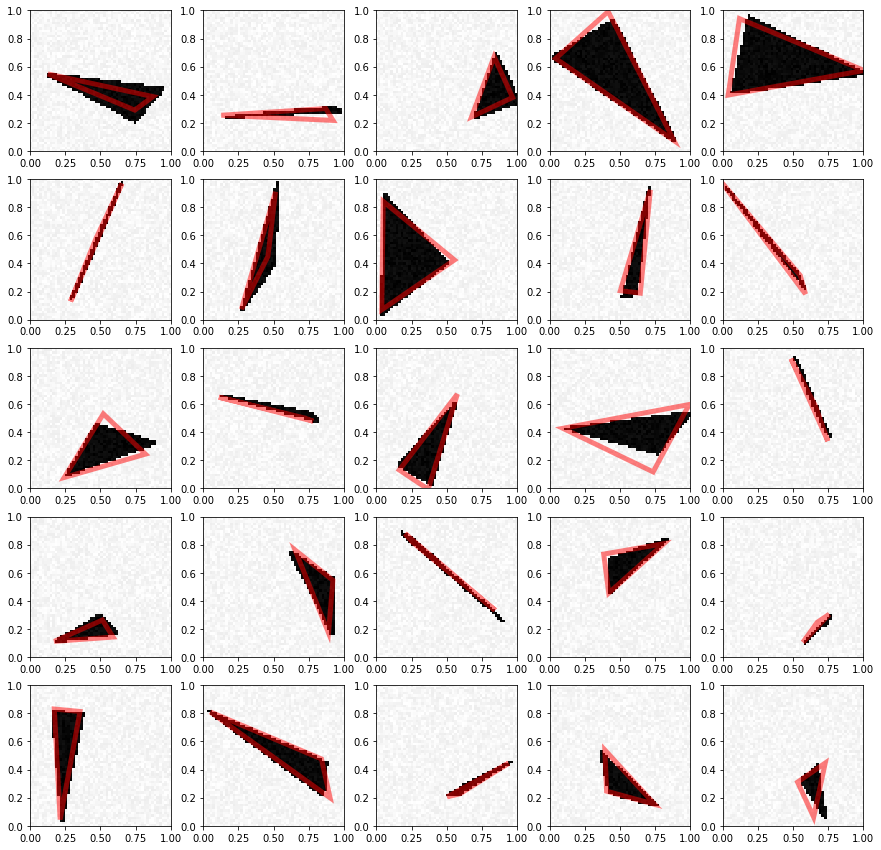

In [215]:
ncols = 5
nrows = 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
for i in range(0, nrows):
    for j in range(0, ncols):
        mp1.visualize_prediction(X_train[j + nrows * i], Y_train_t[j + nrows * i], axes[i, j])

## Vizualization on test set

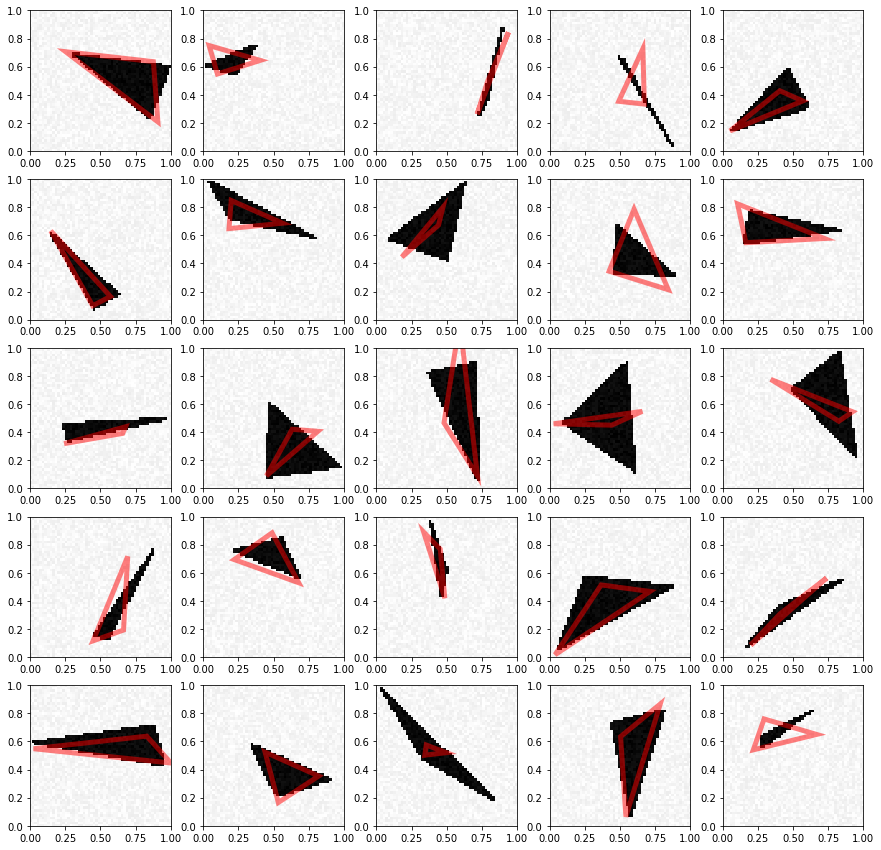

In [217]:
# Vizualization on test set
ncols = 5
nrows = 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
for i in range(0, nrows):
    for j in range(0, ncols):
        mp1.visualize_prediction(X_test[10 + j + nrows * i], Y_test[10 + j + nrows * i], axes[i, j])

## Comments on the results

We do not get a good generalization from the training set to the test set. On the training set the network manages to find the summits accurately whereas on the test set it manages to roughly locate the triangle and sometimes to be not too far from the real summit, but in a lot of cases the summits are not right at all. We thought this could be a sign of overfitting. So we tried :
- Networks with less deep architectures (removed 2 convolutionnal layer and a feed fowrward layer)
- Training the network during less epochs. 
- Increasing training set size

However we do not get better results by doing neither. 

We also tried to change the coordinate system to polar coordinates but this did not improve the results either. 

We are using simple center/reduce normalization here, we think that the normalization is the real problem but we could not come up with better ideas of normalization. 

# 6. Hourglass network for denoising

## Change the functions to generate pairs or (non-noisy, noisy) geometric shapes

In [3]:
def generate_denoising_pair(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdatanoisy = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata, imdatanoisy

In [4]:
def generate_rectangle_pair(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_denoising_pair(figsize, U, V, noise)

In [5]:
def generate_disk_pair(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_denoising_pair(figsize, U, V, noise)

In [6]:
def generate_triangle_pair(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    return generate_denoising_pair(figsize, U, V, noise)

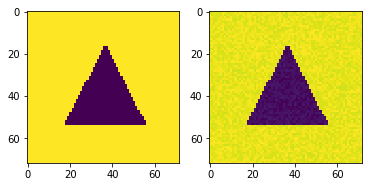

In [8]:
# Verify that it works for triangles
clean, noisy = generate_triangle_pair(noise = 20)
clean2D, noisy2D = reshape_to_2D(clean), reshape_to_2D(noisy)
fig, axes = plt.subplots(ncols=2)
axes[0].imshow(clean2D)
axes[1].imshow(noisy2D)

In [47]:
# Function to generate a whole denoising dataset
def generate_denoising_dataset(nb_samples=300, noise=20, freelocation=False):
    im_size = generate_rectangle_pair()[0].shape[0]
    X_noisy = np.zeros((nb_samples, im_size))
    X_clean = np.zeros((nb_samples, im_size))
    for i in range(0, nb_samples):
        draw = np.random.randint(0, 3)
        if draw == 0:
            X_clean[i, :], X_noisy[i, :] = generate_rectangle_pair(noise, freelocation)
        elif draw == 1:
            X_clean[i, :], X_noisy[i, :]= generate_disk_pair(noise, freelocation)
        else:
            X_clean[i, :], X_noisy[i, :] = generate_triangle_pair(noise, freelocation)
    return X_clean, X_noisy

In [141]:
def reshape_for_network(X):
    X = np.array([reshape_to_2D(x) for x in X])
    X = X.reshape(X.shape + (1, ))
    return X

In [142]:
# Generate dataset and reshape to fit the input of the network
X_clean, X_noisy = generate_denoising_dataset(nb_samples=1000)
X_clean_test, X_noisy_test = generate_denoising_dataset(nb_samples=300)
X_noisy2D = reshape_for_network(X_noisy)
X_clean2D = reshape_for_network(X_clean)
X_noisy2D_test = reshape_for_network(X_noisy_test)
X_clean2D_test = reshape_for_network(X_clean_test)

## Building a hourglass network (= denoising autoencoder)

### Model architecture
We stick to the simplest convolutionnal hourglass architecture : There are two components in the network. 
1. The first set of layers performs dimensionnality reduction. It is called the encoder because it learns a synthetic form of the input in lower dimension. Concretely, it is constituted in our case of:
    - A first convolutionnal layer 
    - A max pooling layer
    - A second convolutionnal layer which outputs the encoded representation
2. The second set of layer performs a dimensionality expansion so as match the dimensions of the original input image. It is called decoder since it reconstructs an image from the synthetic representation learned by the encoder. It is constituted in our case of:
    - An input convolutionnal layer
    - An upsampling layer for dimensionnality augmentation
    - Another convolutionnal layer which is also the output layer

This kind of network is called hourglass since a diagram of the network shows the process of dimension reduction and then dimension expansion which mimics a 3D representation of a hourglass.

In [197]:
model = Sequential()

# ENCODER
# First convolutionnal layer
model.add(Conv2D(filters=16, kernel_size=5, padding='same', input_shape=X_noisy2D[0, :, :, :].shape))
model.add(Activation("relu"))
# First Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation("relu"))
# Second convolutionnal layer
model.add(Conv2D(filters=32, kernel_size=5, padding='same'))
model.add(Activation("relu"))

# DECODER
# First convolutionnal layer
model.add(Conv2D(filters=32, kernel_size=5, padding='same'))
model.add(Activation("relu"))
# First Upsampling layer
model.add(UpSampling2D((2, 2)))
model.add(Activation("relu"))
# Decoding final layer
model.add(Conv2D(filters=1, kernel_size=5, padding='same'))
model.add(Activation("relu"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 72, 72, 16)        416       
_________________________________________________________________
activation_123 (Activation)  (None, 72, 72, 16)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 36, 36, 16)        0         
_________________________________________________________________
activation_124 (Activation)  (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 36, 36, 32)        12832     
_________________________________________________________________
activation_125 (Activation)  (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 36, 36, 32)        25632     
__________

### Optimization using the Adam optimizer
Since we are in a regression problem, we use the classic loss: mean squared error. 

In [137]:
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
autoencoder.compile(loss='mean_squared_error',
              optimizer=adam)

# Training
epochs = 5
batch_size = 50
history = autoencoder.fit(X_noisy2D, X_clean2D, epochs=epochs, batch_size=batch_size)

## Vizualization on test set

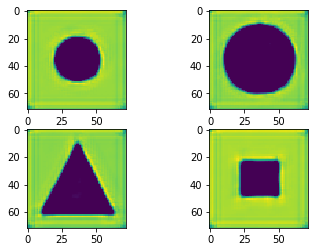

In [198]:
# Prediction on test set
X_pred = autoencoder.predict(X_noisy2D_test)

# Plot a few example of test set
fig, axes = plt.subplots(2, 2)
axes[0, 0].imshow(X_pred[0, :, :, 0])
axes[1, 0].imshow(X_pred[1, :, :, 0])
axes[0, 1].imshow(X_pred[2, :, :, 0])
axes[1, 1].imshow(X_pred[3, :, :, 0])

## Comments on the results

We do not get a fully clean uniform background, but we de have a whole lot less noise. It is also very interesting to notice that the resulting images are "smoother" than the original ones (we do not see the pixels forming a "staircase" as in the original non noisy images as if some kind of Gaussian blur had been applied. To finish with just along the edges we can see an "anticontour" that is brighter than the background. This may actually help identify the contours if one was to use these transformed images as input data in a new model.